In [1]:
import  numpy as np
import matplotlib.pyplot as plt

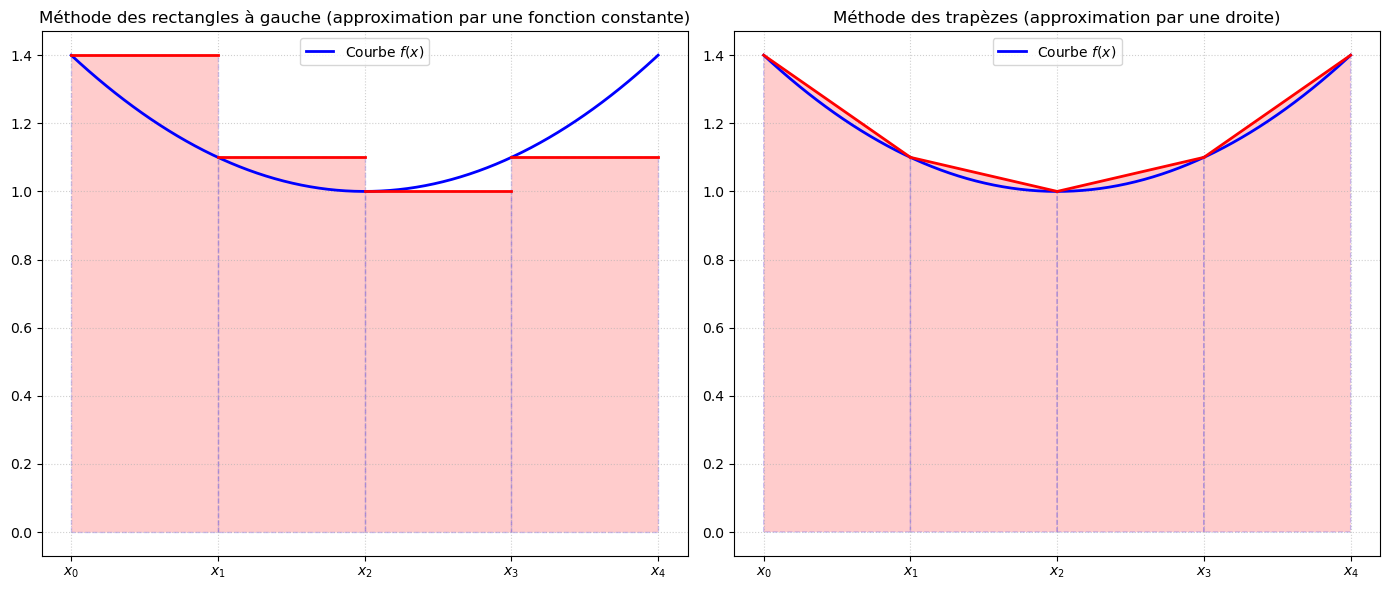

In [2]:
def f(x):
    return 0.1 * (x - 2)**2 + 1

a, b = 0, 4
n = 4
h = (b - a) / n
x_sub = np.linspace(a, b, n + 1)
y_sub = f(x_sub)

x_fine = np.linspace(a, b, 200)
y_fine = f(x_fine)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Sous-figure 1 : Rectangles (Gauche) ---
ax1.plot(x_fine, y_fine, 'b-', lw=2, label="Courbe $f(x)$")
for k in range(n):
    xk, xk_next = x_sub[k], x_sub[k+1]
    fk = y_sub[k]
    # Tracé du rectangle
    ax1.fill([xk, xk, xk_next, xk_next], [0, fk, fk, 0], 
             'red', alpha=0.2, edgecolor='blue', linestyle='--')
    ax1.plot([xk, xk_next], [fk, fk], 'r-', lw=2) # Segment horizontal

ax1.set_title("Méthode des rectangles à gauche (approximation par une fonction constante)")
ax1.set_xticks(x_sub)
ax1.set_xticklabels([f'$x_{i}$' for i in range(n+1)])
ax1.legend()
ax1.grid(True, linestyle=':', alpha=0.6)

# --- Sous-figure 2 : Trapèzes ---
ax2.plot(x_fine, y_fine, 'b-', lw=2, label="Courbe $f(x)$")
for k in range(n):
    xk, xk_next = x_sub[k], x_sub[k+1]
    fk, fk_next = y_sub[k], y_sub[k+1]
    # Tracé du trapèze
    ax2.fill([xk, xk, xk_next, xk_next], [0, fk, fk_next, 0], 
             'red', alpha=0.2, edgecolor='blue', linestyle='--')
    ax2.plot([xk, xk_next], [fk, fk_next], 'r-', lw=2) # Segment affine (oblique)

ax2.set_title("Méthode des trapèzes (approximation par une droite)")
ax2.set_xticks(x_sub)
ax2.set_xticklabels([f'$x_{i}$' for i in range(n+1)])
ax2.legend()
ax2.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

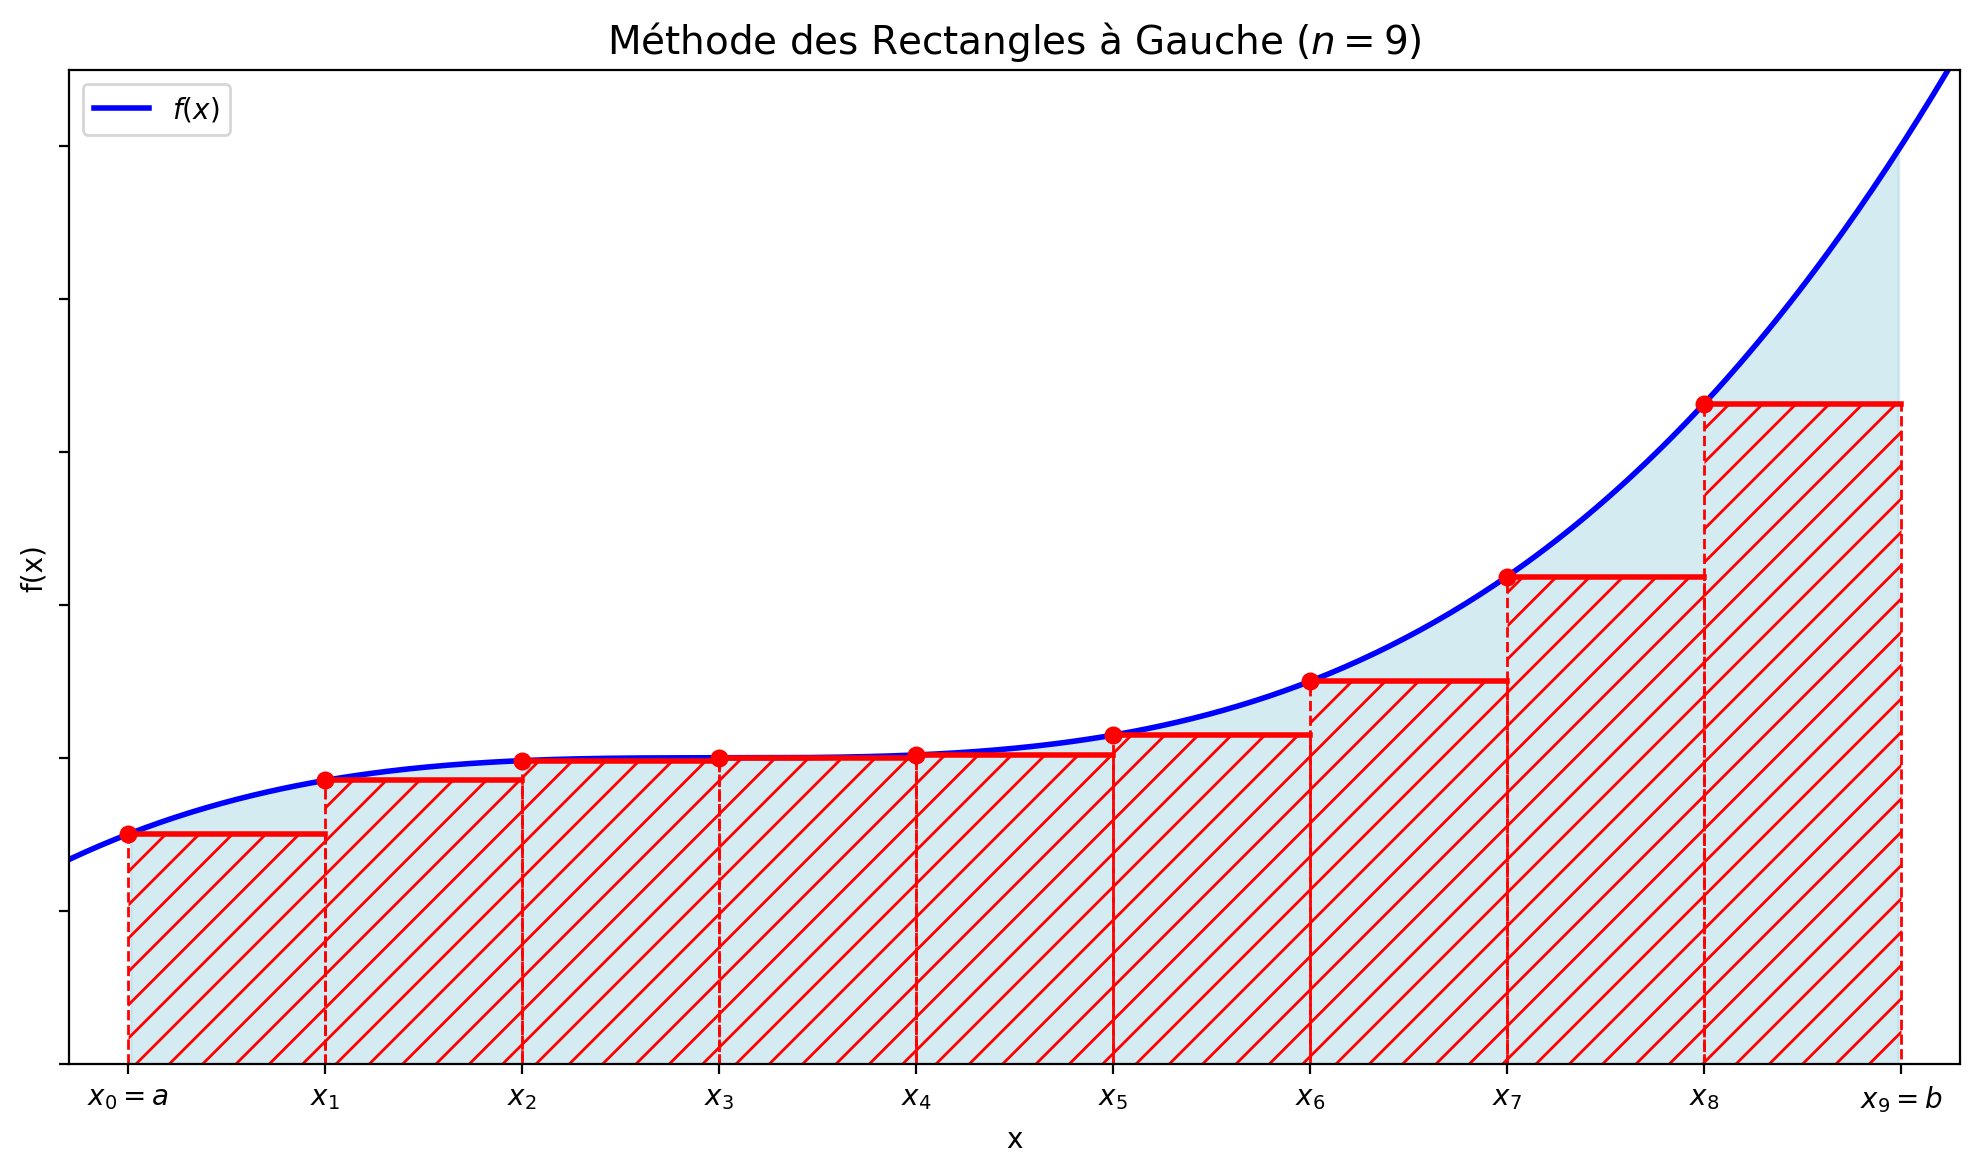

In [42]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

# Définition de la fonction test
def f(x):
    return 4*(x-0.5)**3 + 2

# Paramètres de la discrétisation
a, b = 0, 1.5
n = 9  # 9 subdivisions donnent 10 bornes : x0, x1, ..., x9
h = (b - a) / n

# Calcul des nœuds et des images
x_nodes = np.linspace(a, b, n + 1)
y_nodes = f(x_nodes)

# Points pour le tracé de la courbe lisse
x_fine = np.linspace(a - 0.1, b + 0.1, 400)
y_fine = f(x_fine)

plt.figure(figsize=(10, 6))

# 1. Tracé de la courbe réelle
plt.plot(x_fine, y_fine, color='blue', lw=2, label=r"$f(x)$")

# 1bis. Aire sous la courbe en jaune pâle
x_fill = x_fine[(x_fine >= a) & (x_fine <= b)]
y_fill = f(x_fill)
plt.fill_between(x_fill, 0, y_fill, color='lightblue', alpha=0.5)

# 2. Construction des rectangles
for k in range(n):
    xk = x_nodes[k]
    xk_next = x_nodes[k+1]
    fk = y_nodes[k]  # Hauteur prise à GAUCHE de l'intervalle
    
    # Remplissage du rectangle
    plt.fill([xk, xk, xk_next, xk_next], [0, fk, fk, 0], 
             facecolor='none', hatch='//', alpha=1, edgecolor='red', linestyle='--')
    
    # Segment horizontal supérieur (approximation constante)
    plt.plot([xk, xk_next], [fk, fk], color='red', lw=2)
    
    # Point de contact (xi_k, f(xi_k))
    plt.scatter(xk, fk, color='red', s=30, zorder=5)

# 3. Mise en forme du graphique
tick_labels = [r'$x_0=a$'] + [f'$x_{{{i}}}$' for i in range(1, n)] + [r'$x_9=b$']
plt.xticks(x_nodes, tick_labels)
plt.tick_params(axis='y', labelleft=False)
plt.title(f"Méthode des Rectangles à Gauche ($n={n}$)", fontsize=14)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(a - 0.05, b + 0.05)
plt.ylim(0, f(b) + 0.5)
plt.legend()


plt.tight_layout()
plt.show()

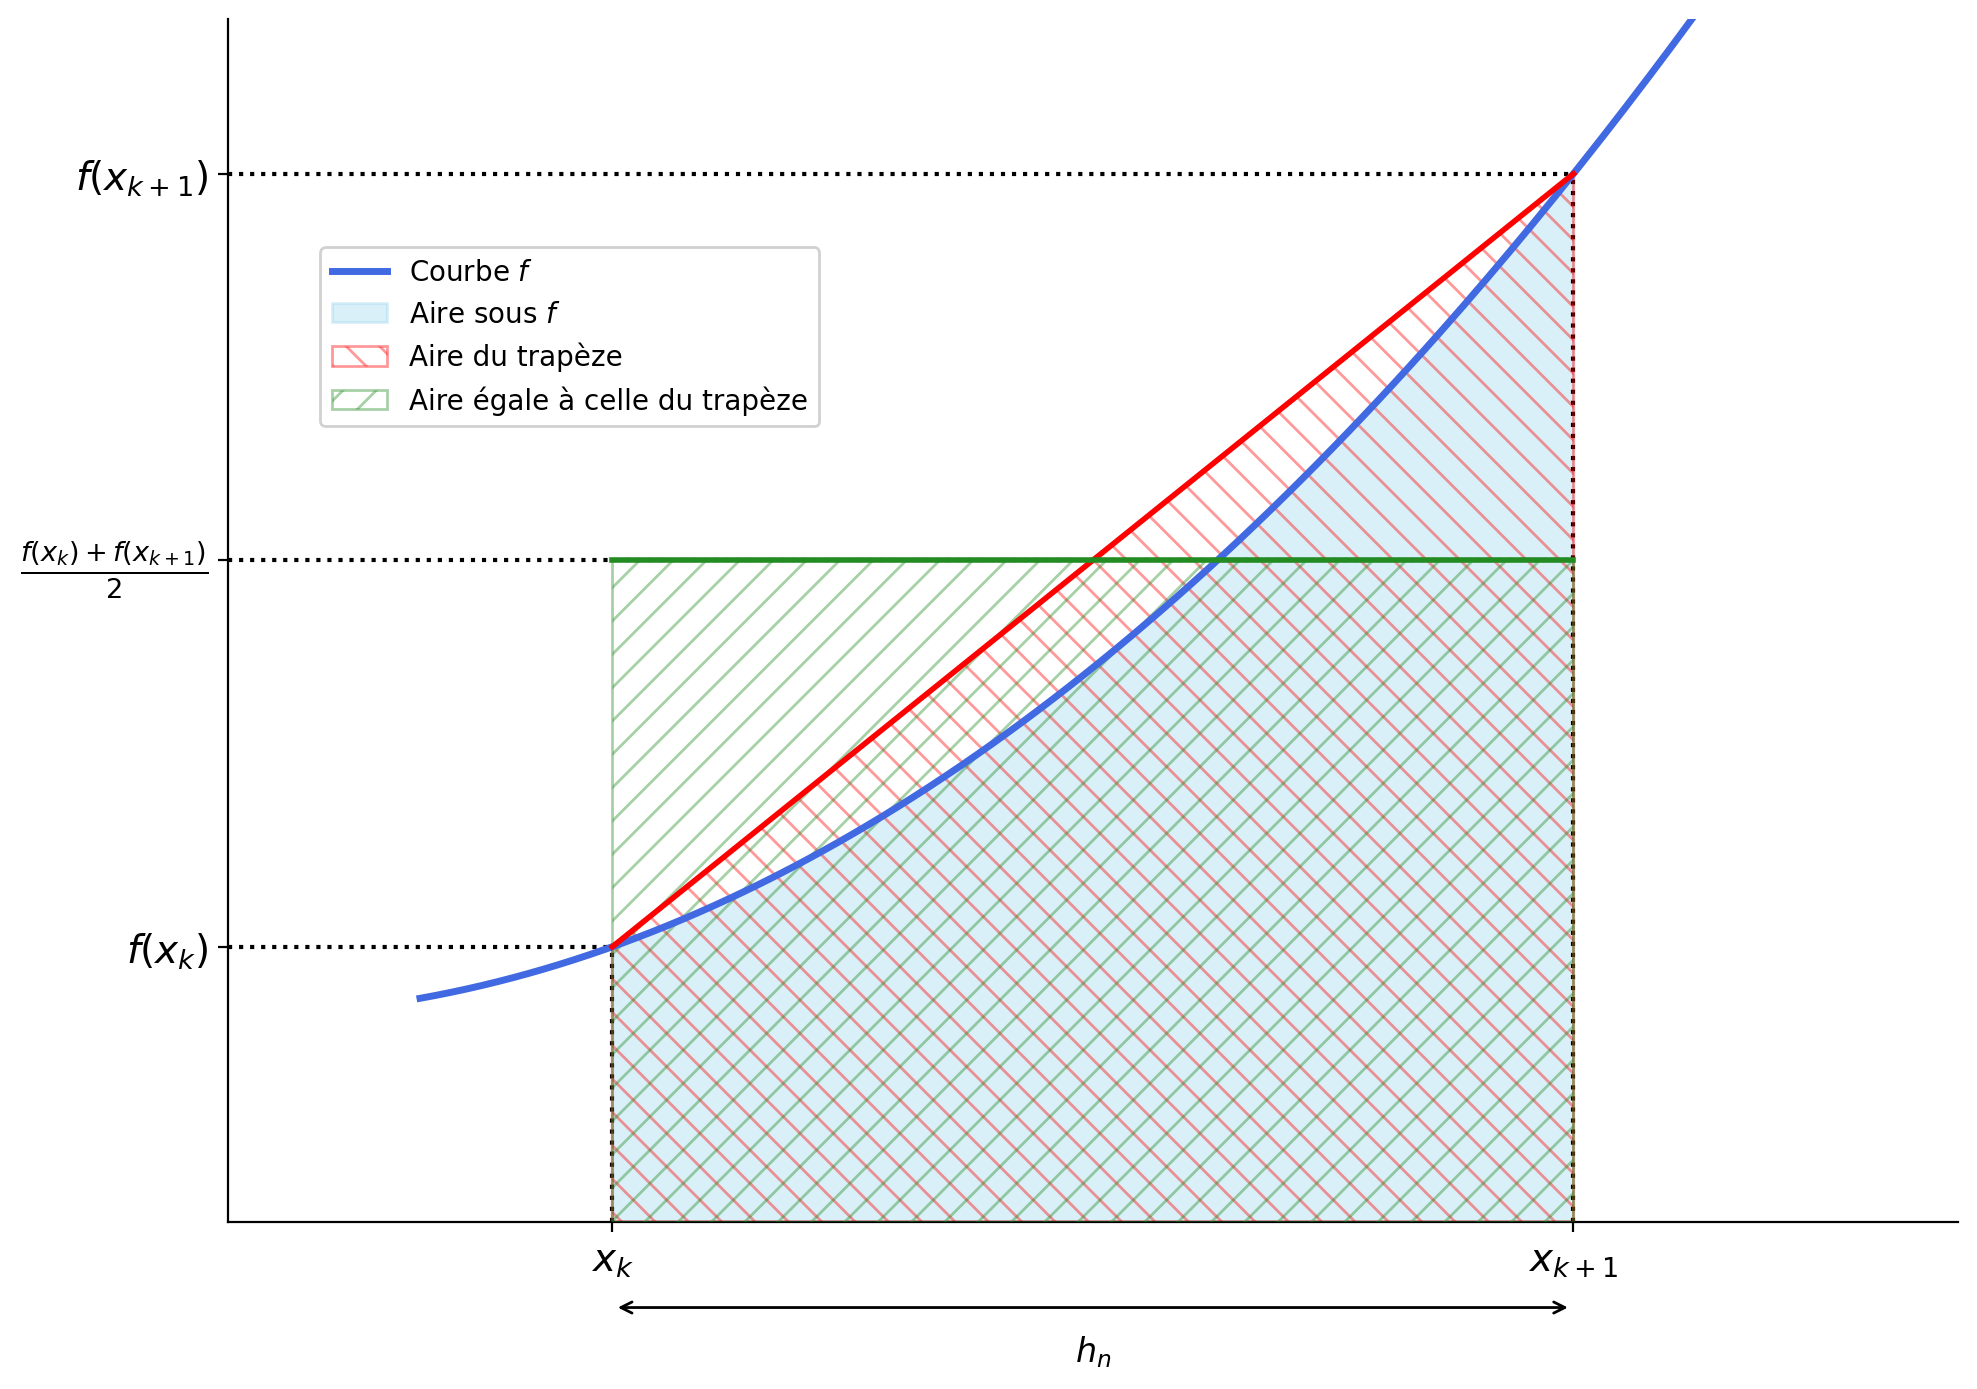

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

def f(x):
    return 0.4 * x**2 + 1.2

# Définition de l'intervalle [xk, xk+1]
xk = 1.0
xk_plus_1 = 3.5
h_n = xk_plus_1 - xk

f_xk = f(xk)
f_xk_plus_1 = f(xk_plus_1)
f_moy = (f_xk + f_xk_plus_1) / 2

# Points pour les tracés (courbe fine et segments)
x_fine = np.linspace(0.5, 4.5, 200)
x_trap = np.array([xk, xk_plus_1])
y_trap = np.array([f_xk, f_xk_plus_1])

# Initialisation de la figure
fig, ax = plt.subplots(figsize=(10, 7))

# 1. Tracé de la courbe réelle f (bleue)
ax.plot(x_fine, f(x_fine), color='royalblue', lw=2.5, label='Courbe $f$', zorder=10)

# 2. Remplissage bleu uni sous la courbe f
x_fill_f = np.linspace(xk, xk_plus_1, 100)
ax.fill_between(x_fill_f, 0, f(x_fill_f), color='skyblue', alpha=0.3, label='Aire sous $f$', zorder=1)

# 3. Remplissage HACHURÉ ROUGE sous le segment affine (le trapèze)
ax.fill_between(x_trap, 0, y_trap, facecolor='none', edgecolor='red',
                hatch=r'\\', alpha=0.4, label='Aire du trapèze', zorder=2)

# 4. Remplissage HACHURÉ VERT sous le segment horizontal (le rectangle)
# Utilisation de r'///' pour incliner les hachures dans l'autre sens
ax.fill_between(x_trap, 0, [f_moy, f_moy], facecolor='none', edgecolor='forestgreen',
                hatch=r'//', alpha=0.4, label='Aire égale à celle du trapèze', zorder=3)

# 5. Segments principaux (rouge pour l'affine, vert pour la moyenne)
ax.plot(x_trap, y_trap, color='red', lw=2, label=None, zorder=11)
ax.plot([xk, xk_plus_1], [f_moy, f_moy], color='forestgreen', lw=2, label=None, zorder=11)

# 6. Droites en pointillés pour les projections sur l'axe des ordonnées
ax.hlines(f_xk, 0, xk, colors='k', linestyles=':', lw=1.5, zorder=1)
ax.hlines(f_moy, 0, xk_plus_1, colors='k', linestyles=':', lw=1.5, zorder=1)
ax.hlines(f_xk_plus_1, 0, xk_plus_1, colors='k', linestyles=':', lw=1.5, zorder=1)

# Lignes verticales de rappel (bornes xk et xk+1)
ax.vlines([xk, xk_plus_1], 0, [f_xk, f_xk_plus_1], color='black', linestyle=':', lw=1.5, zorder=1)

# 7. Labels personnalisés sur les axes (suppression des graduations numériques)
ax.set_xticks([xk, xk_plus_1])
ax.set_xticklabels(['$x_k$', '$x_{k+1}$'], fontsize=14)

ax.set_yticks([f_xk, f_moy, f_xk_plus_1])
ax.set_yticklabels(['$f(x_k)$', r'$\frac{f(x_k)+f(x_{k+1})}{2}$', '$f(x_{k+1})$'], fontsize=14)

# 8. Esthétique générale
ax.set_xlim(0, 4.5)
ax.set_ylim(0, 7)

# Flèche indiquant la largeur hn (placée en y = -0.5)
ax.annotate('', xy=(xk, -0.5), xytext=(xk_plus_1, -0.5),
            arrowprops=dict(arrowstyle='<->', color='black'),
            annotation_clip=False) # Permet d'afficher même si c'est hors limite

# Texte hn (placé un peu plus bas que la flèche, en y = -0.8)
ax.text((xk + xk_plus_1)/2, -0.65, '$h_n$', 
        ha='center', va='top', fontsize=12)

# Nettoyage des bordures du graphique
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(bbox_to_anchor=(0.35, 0.65), frameon=True, framealpha=0.9)

plt.tight_layout()
plt.show()

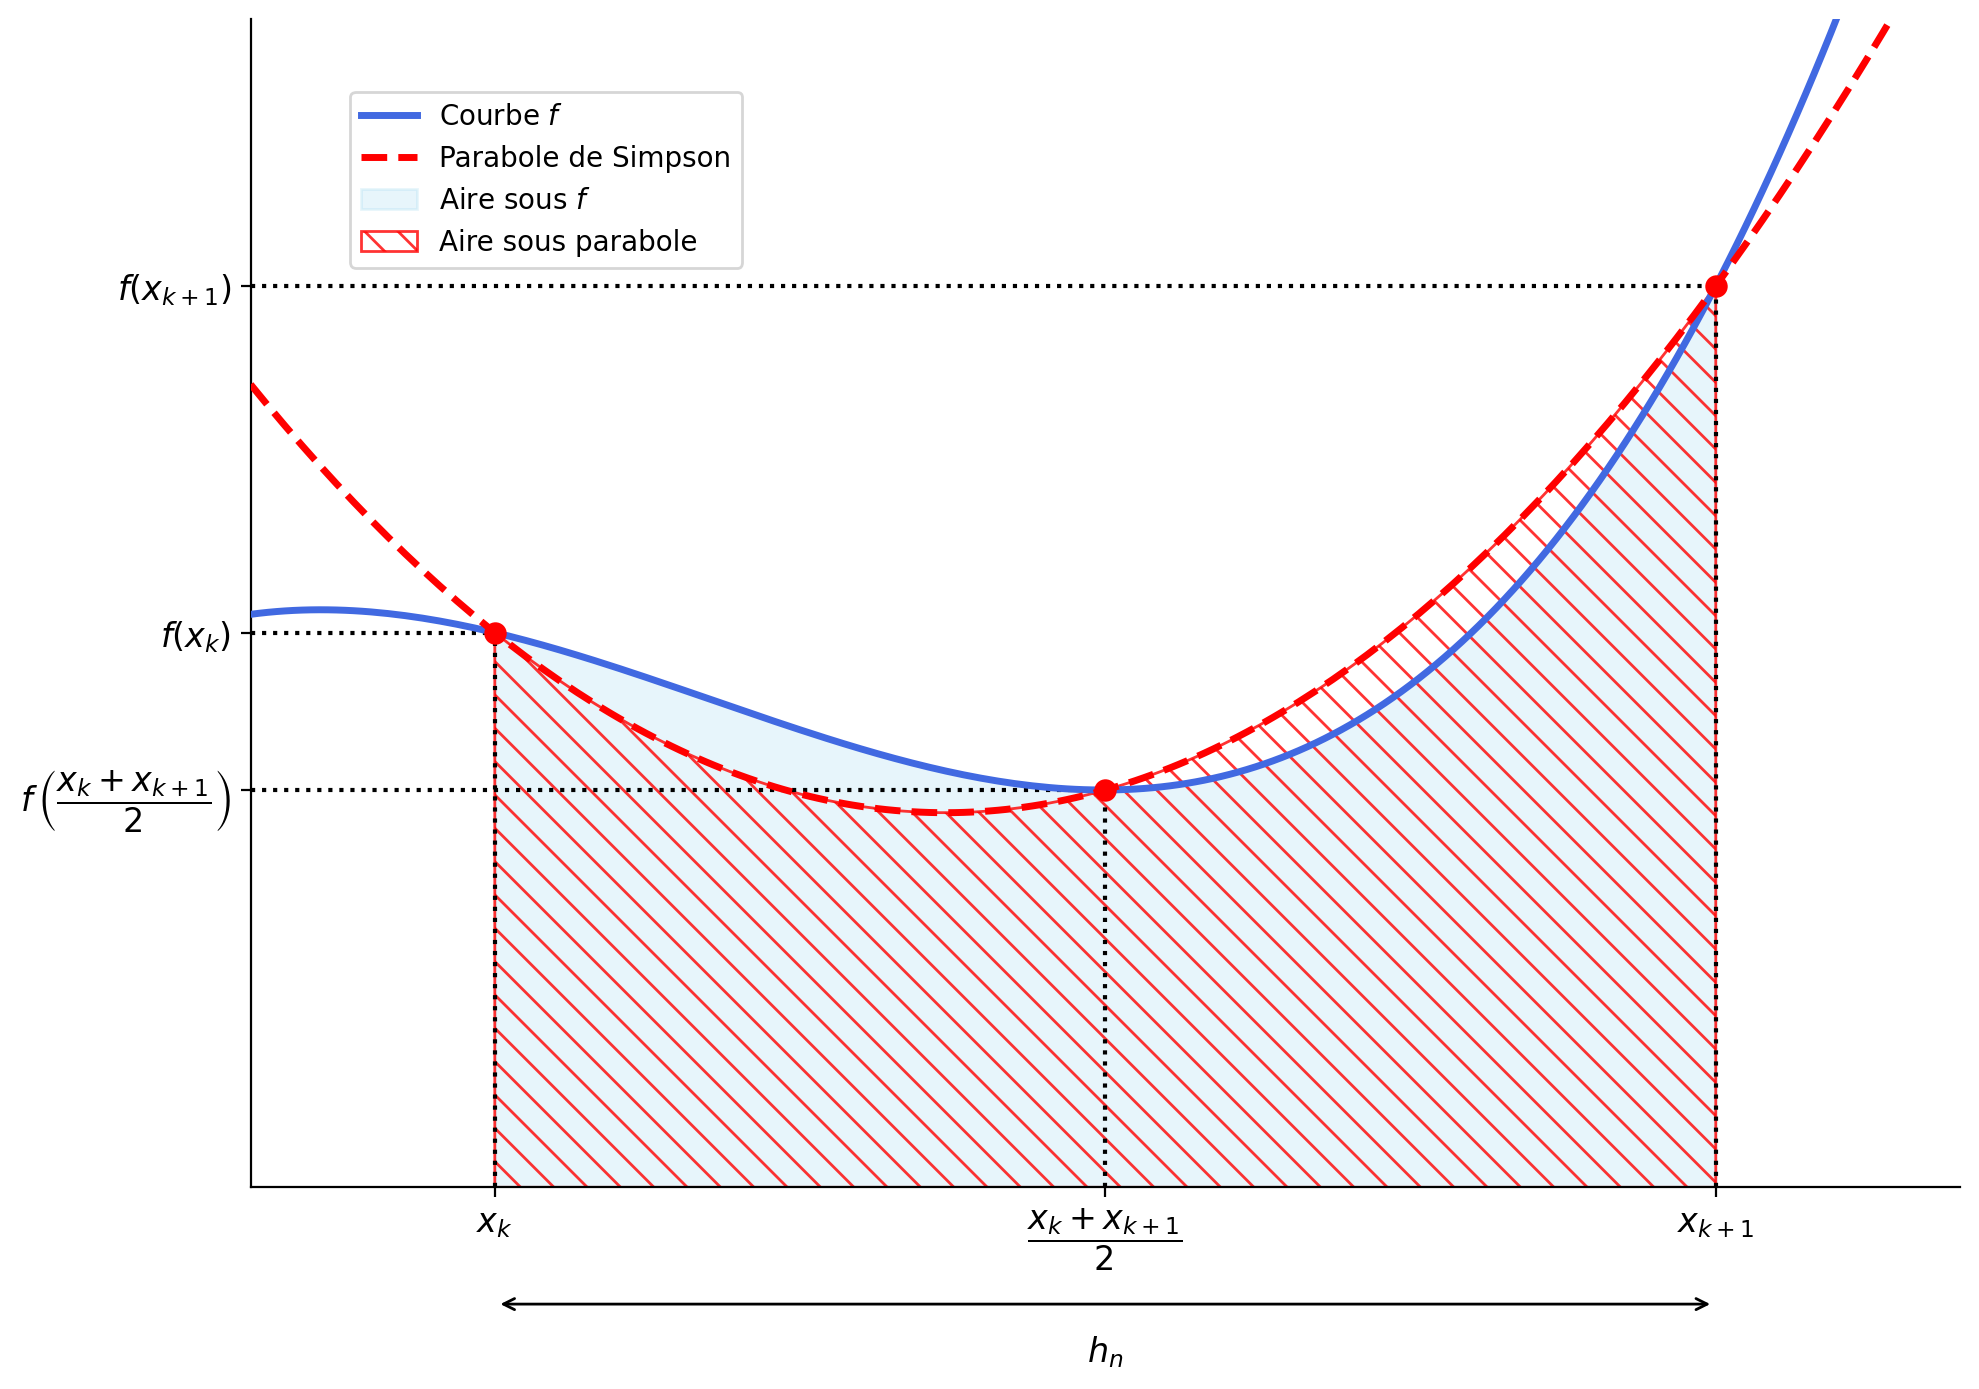

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    # On utilise une fonction avec un peu plus de courbure pour bien voir la parabole
    return 0.3 * (x-0.5)**3 - 0.4 * x**2 + 2 

%config InlineBackend.figure_format = 'retina'

# 1. Définition des points clés
xk = 0.5
xk_plus_1 = 3
x_mid = (xk + xk_plus_1) / 2
h_n = xk_plus_1 - xk

f_xk = f(xk)
f_mid = f(x_mid)
f_xk_plus_1 = f(xk_plus_1)

# Calcul de la "Hauteur de Simpson" (la moyenne pondérée)
f_simpson = (f_xk + 4*f_mid + f_xk_plus_1) / 6

# 2. Construction de la parabole de Simpson (Interpolation de Lagrange)
# On crée un polynôme de degré 2 passant par les 3 points
poly_simpson = np.polyfit([xk, x_mid, xk_plus_1], [f_xk, f_mid, f_xk_plus_1], 2)
p = np.poly1d(poly_simpson)

# Points pour les tracés
x_fine = np.linspace(0, 3.5, 200)
x_range = np.linspace(xk, xk_plus_1, 100)
y_parabole = p(x_fine)

# Initialisation de la figure
fig, ax = plt.subplots(figsize=(10, 7))

# --- TRACÉS ---

# 1. Courbe réelle f
ax.plot(x_fine, f(x_fine), color='royalblue', lw=2.5, label='Courbe $f$', zorder=10)

# 5. Éléments graphiques de Simpson
ax.plot(x_fine, y_parabole, color='red', lw=2.5, linestyle='--', label='Parabole de Simpson', zorder=11)
ax.scatter([xk, x_mid, xk_plus_1], [f_xk, f_mid, f_xk_plus_1], color='red', s=50, zorder=12)

# 2. Remplissage bleu sous f
ax.fill_between(x_range, 0, f(x_range), color='skyblue', alpha=0.2, label='Aire sous $f$', zorder=1)

# 3. Remplissage HACHURÉ ROUGE sous la PARABOLE de Simpson
ax.fill_between(x_range, 0, p(x_range), facecolor='none', edgecolor='red',
                hatch=r'\\', alpha=0.8, label='Aire sous parabole', zorder=2)

# 6. Projections et pointillés
ax.hlines([f_xk, f_mid, f_xk_plus_1], 0, [xk, x_mid, xk_plus_1], colors='k', linestyles=':', lw=1.5)
ax.vlines([xk, x_mid, xk_plus_1], 0, [f_xk, f_mid, f_xk_plus_1], color='black', linestyle=':', lw=1.5)

# 7. Labels des axes
ax.set_xticks([xk, x_mid, xk_plus_1])
ax.set_xticklabels(['$x_k$', r'$\dfrac{x_k+x_{k+1}}{2}$', '$x_{k+1}$'], fontsize=12)

ax.set_yticks([f_xk, f_mid, f_xk_plus_1])
ax.set_yticklabels(['$f(x_k)$', r'$f\,\left(\dfrac{x_k+x_{k+1}}{2}\right)$', '$f(x_{k+1})$'], fontsize=12)

# 8. Esthétique
ax.set_xlim(0, 3.5)
ax.set_ylim(0, 4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Flèche hn
ax.annotate('', xy=(xk, -0.4), xytext=(xk_plus_1, -0.4),
            arrowprops=dict(arrowstyle='<->', color='black'), annotation_clip=False)
ax.text((xk + xk_plus_1)/2, -0.5, '$h_n$', ha='center', va='top', fontsize=12)

ax.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), frameon=True)

plt.tight_layout()
plt.show()

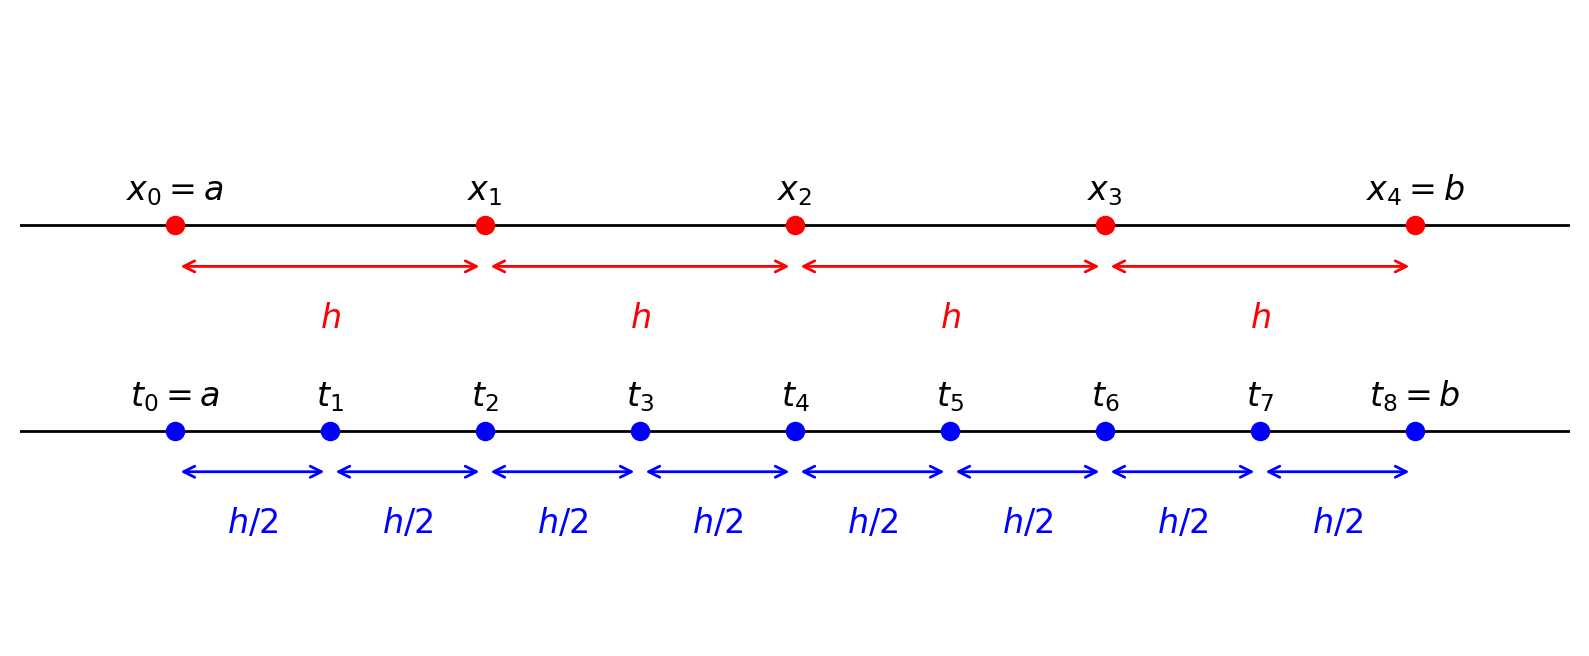

In [56]:
def tracer_discretisations(a, b, n):
    h = (b - a) / n
    x_k = np.linspace(a, b, n + 1)
    t_j = a + np.arange(0, 2 * n + 1) * (h / 2)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
    
    # --- Discretisation simple ---
    ax1.axhline(0, color='black', linewidth=1)
    ax1.scatter(x_k, np.zeros_like(x_k), color='red', zorder=5)
    for i, x in enumerate(x_k):
        label = f'$x_{i}$'
        if i == 0: label = f'$x_0=a$'
        if i == n: label = f'$x_{n}=b$'
        ax1.text(x, 0.06, label, ha='center', fontsize=12)
    if n > 1:
        for i in range(n):
            mid = (x_k[i] + x_k[i + 1]) / 2
            ax1.annotate('', xy=(x_k[i], -0.1), xytext=(x_k[i + 1], -0.1),
                         arrowprops=dict(arrowstyle='<->', color='red'))
            ax1.text(mid, -0.25, '$h$', ha='center', color='red', fontsize=12)
    ax1.set_ylim(-0.5, 0.5)
    ax1.axis('off')
    
    # --- Discretisation double ---
    ax2.axhline(0, color='black', linewidth=1)
    ax2.scatter(t_j, np.zeros_like(t_j), color='blue', zorder=5)
    for j, t in enumerate(t_j):
        label = f'$t_{j}$'
        if j == 0: label = f'$t_0=a$'
        if j == 2 * n: label = f'$t_{2 * n}=b$'
        ax2.text(t, 0.06, label, ha='center', fontsize=12)
    if n > 0:
        for j in range(2 * n):
            mid = (t_j[j] + t_j[j + 1]) / 2
            ax2.annotate('', xy=(t_j[j], -0.1), xytext=(t_j[j + 1], -0.1),
                         arrowprops=dict(arrowstyle='<->', color='blue'))
            ax2.text(mid, -0.25, '$h/2$', ha='center', color='blue', fontsize=12)
    ax2.set_ylim(-0.5, 0.5)
    ax2.axis('off')
    
    ax1.set_xlim(a - 0.5, b + 0.5)
    ax2.set_xlim(a - 0.5, b + 0.5)
    fig.subplots_adjust(hspace=-0.5)
    plt.show()

tracer_discretisations(1, 5, 4)

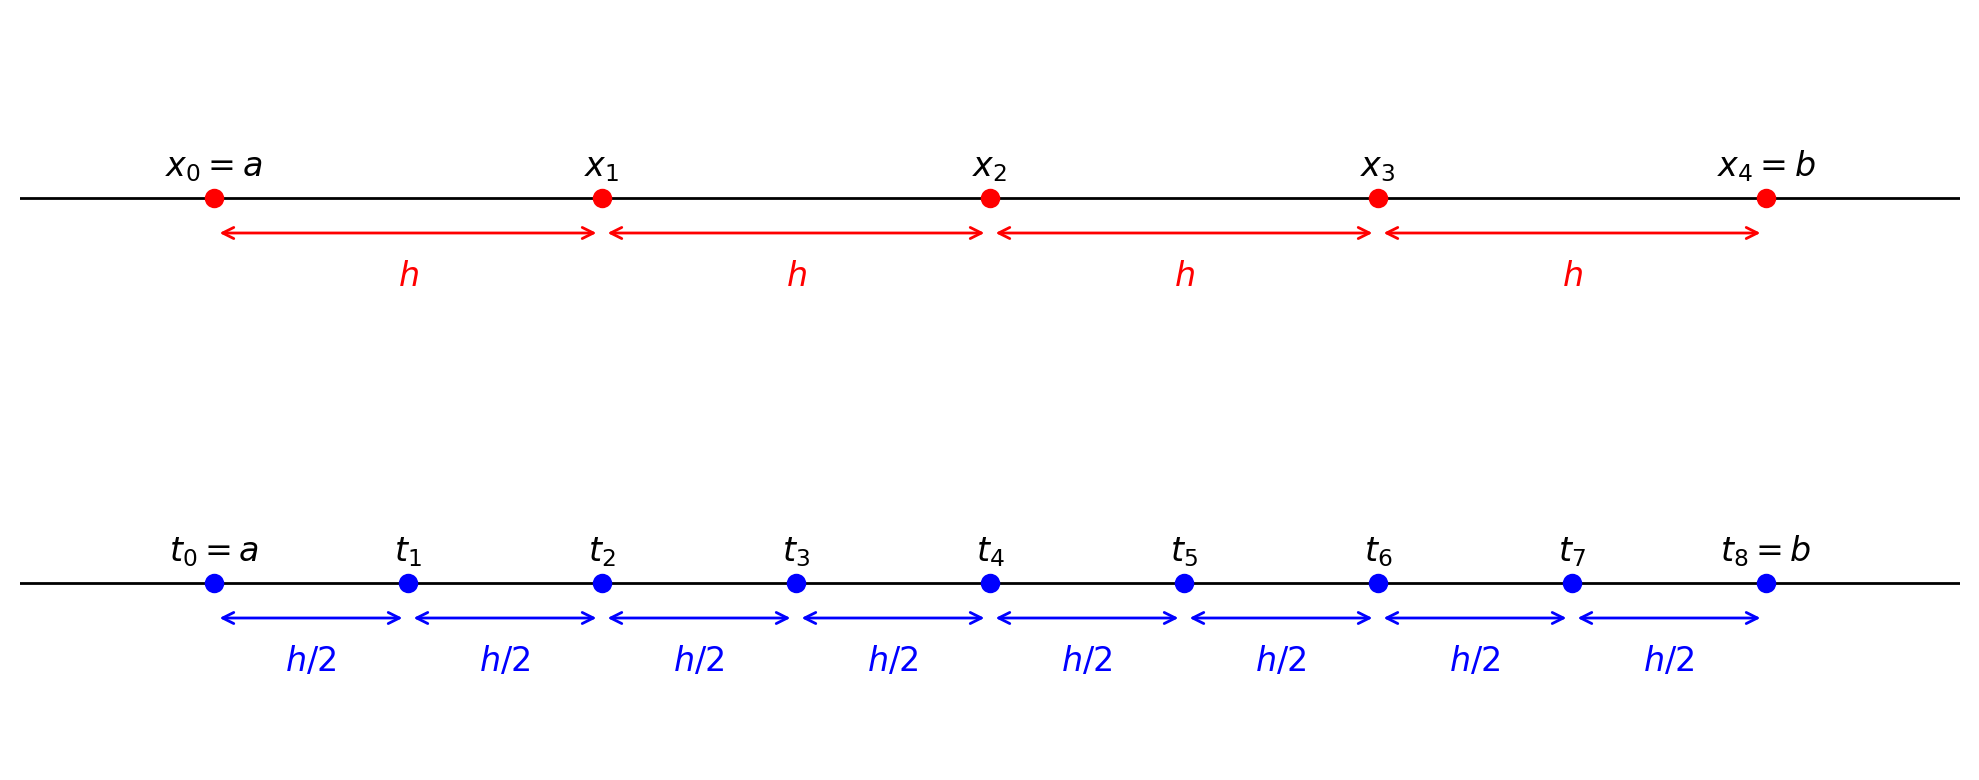

In [48]:
def tracer_discretisations(a, b, n):
    h = (b - a) / n
    x_k = np.linspace(a, b, n + 1)
    t_j = a + np.arange(0, 2 * n + 1) * (h / 2)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
    
    # --- Discretisation simple ---
    ax1.axhline(0, color='black', linewidth=1)
    ax1.scatter(x_k, np.zeros_like(x_k), color='red', zorder=5)
    for i, x in enumerate(x_k):
        label = f'$x_{i}$'
        if i == 0: label = f'$x_0=a$'
        if i == n: label = f'$x_{n}=b$'
        ax1.text(x, 0.06, label, ha='center', fontsize=12)
    if n > 1:
        for i in range(n):
            mid = (x_k[i] + x_k[i + 1]) / 2
            ax1.annotate('', xy=(x_k[i], -0.1), xytext=(x_k[i + 1], -0.1),
                         arrowprops=dict(arrowstyle='<->', color='red'))
            ax1.text(mid, -0.25, '$h$', ha='center', color='red', fontsize=12)
    ax1.set_ylim(-0.5, 0.5)
    ax1.axis('off')
    
    
    # --- Discretisation double ---
    ax2.axhline(0, color='black', linewidth=1)
    ax2.scatter(t_j, np.zeros_like(t_j), color='blue', zorder=5)
    for j, t in enumerate(t_j):
        label = f'$t_{j}$'
        if j == 0: label = f'$t_0=a$'
        if j == 2 * n: label = f'$t_{2 * n}=b$'
        ax2.text(t, 0.06, label, ha='center', fontsize=12)
    if n > 0:
        for j in range(2 * n):
            mid = (t_j[j] + t_j[j + 1]) / 2
            ax2.annotate('', xy=(t_j[j], -0.1), xytext=(t_j[j + 1], -0.1),
                         arrowprops=dict(arrowstyle='<->', color='blue'))
            ax2.text(mid, -0.25, '$h/2$', ha='center', color='blue', fontsize=12)
    ax2.set_ylim(-0.5, 0.5)
    ax2.axis('off')
    
    ax1.set_xlim(a - 0.5, b + 0.5)
    ax2.set_xlim(a - 0.5, b + 0.5)
    plt.tight_layout()
    plt.show()

tracer_discretisations(1, 5, 4)

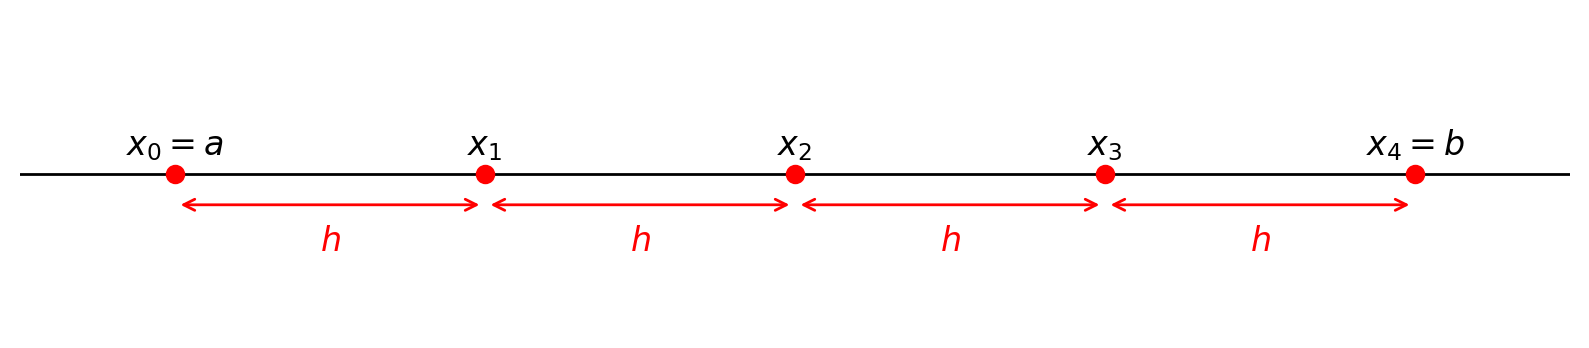

In [52]:
def tracer_discretisation_simple(a, b, n):
    h = (b - a) / n
    x_k = np.linspace(a, b, n + 1)
    
    plt.figure(figsize=(10, 2))
    plt.axhline(0, color='black', linewidth=1)
    plt.scatter(x_k, np.zeros_like(x_k), color='red', zorder=5)
    
    for i, x in enumerate(x_k):
        label = f'$x_{i}$'
        if i == 0: label = f'$x_0=a$'
        if i == n: label = f'$x_{n}=b$'
        plt.text(x, 0.06, label, ha='center', fontsize=12)
    
    if n > 1:
        for i in range(n):
            mid = (x_k[i] + x_k[i + 1]) / 2
            plt.annotate('', xy=(x_k[i], -0.1), xytext=(x_k[i + 1], -0.1),
                         arrowprops=dict(arrowstyle='<->', color='red'))
            plt.text(mid, -0.25, '$h$', ha='center', color='red', fontsize=12)
    
    plt.ylim(-0.5, 0.5)
    plt.xlim(a - 0.5, b + 0.5)
    plt.axis('off')
    plt.show()

tracer_discretisation_simple(1, 5, 4)

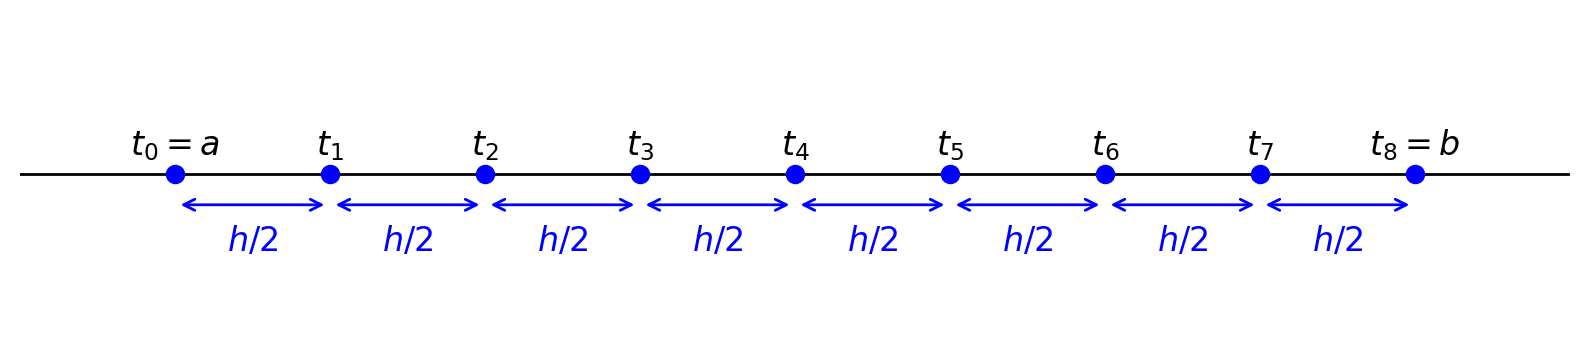

In [51]:
def tracer_discretisation_double(a, b, n):
    h = (b - a) / n
    t_j = a + np.arange(0, 2 * n + 1) * (h / 2)
    
    plt.figure(figsize=(10, 2))
    plt.axhline(0, color='black', linewidth=1)
    plt.scatter(t_j, np.zeros_like(t_j), color='blue', zorder=5)
    
    for j, t in enumerate(t_j):
        label = f'$t_{j}$'
        if j == 0: label = f'$t_0=a$'
        if j == 2 * n: label = f'$t_{2 * n}=b$'
        plt.text(t, 0.06, label, ha='center', fontsize=12)
    
    if n > 0:
        for j in range(2 * n):
            mid = (t_j[j] + t_j[j + 1]) / 2
            plt.annotate('', xy=(t_j[j], -0.1), xytext=(t_j[j + 1], -0.1),
                         arrowprops=dict(arrowstyle='<->', color='blue'))
            plt.text(mid, -0.25, '$h/2$', ha='center', color='blue', fontsize=12)
    
    plt.ylim(-0.5, 0.5)
    plt.xlim(a - 0.5, b + 0.5)
    plt.axis('off')
    plt.show()

tracer_discretisation_double(1, 5, 4)

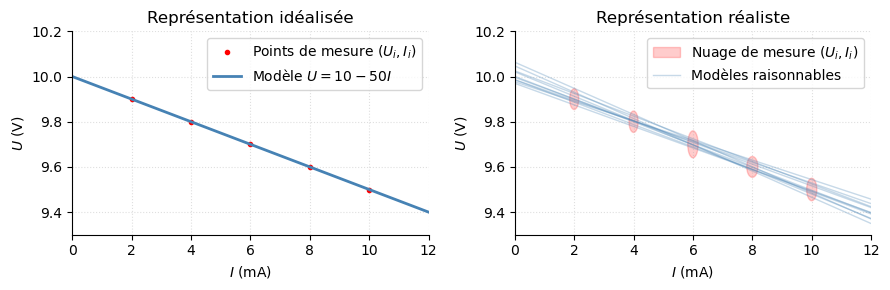

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

# Configuration du style
plt.rcParams['font.family'] = 'sans-serif'

# 1. Données simulées (Modèle de Pouillet : U = 10 - 50*I)
i_vals = np.array([2, 4, 6, 8, 10]) * 1e-3  # Intensités en A
u_vals = 10 - 50 * i_vals                  # Tensions en V

# Création de la figure (on retire sharey=True pour voir les ordonnées à droite)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

# --- Graphique A : Représentation Simplifiée ---
ax1.plot(i_vals * 1e3, u_vals, 'r.', markersize=6, label="Points de mesure ($U_i, I_i$)")
ax1.plot([0, 12], [10, 10 - 50 * 0.012], color='steelblue', linewidth=2, label="Modèle $U = 10 - 50I$")
ax1.set_title("Représentation idéalisée")
ax1.legend(loc='upper right')

# --- Graphique B : Représentation Réelle ---
np.random.seed(46)
n_droites = 10
m_sim = np.random.normal(9.7, 0.02, n_droites)
r_sim = np.random.normal(50, 5, n_droites)


# Ajout des Nuages d'Incertitude (Ellipses rouges variables)
for idx, (ii, uu) in enumerate(zip(i_vals * 1e3, u_vals)):
    v_width = np.random.uniform(0.3, 0.5)
    v_height = np.random.uniform(0.08, 0.12)
    
    label_e = "Nuage de mesure ($U_i, I_i$)" if idx == 0 else ""
    ellipse = Ellipse((ii, uu), width=v_width, height=v_height, angle=0, 
                      edgecolor='red', facecolor='red', alpha=0.2, label=label_e)
    ax2.add_patch(ellipse)


# Tracé des droites (Modèles)
for idx, (e_v, r_v) in enumerate(zip(m_sim, r_sim)):
    i_coords = np.array([0, 12])
    u_coords = e_v - r_v * ((i_coords - 6) * 1e-3)
    # On met un label uniquement pour la première droite pour la légende
    label_m = "Modèles raisonnables" if idx == 0 else ""
    ax2.plot(i_coords, u_coords, color='steelblue', alpha=0.3, linewidth=1, label=label_m)


ax2.set_title("Représentation réaliste")
ax2.legend(loc='upper right') # Affichage de la légende demandée

# Configuration commune des axes
for ax in [ax1, ax2]:
    ax.set_xlabel('$I$ (mA)')
    ax.set_ylabel('$U$ (V)')
    ax.set_xlim(0, 12)
    ax.set_ylim(9.3, 10.2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle=':', alpha=0.4)

plt.tight_layout()

plt.savefig("points_vs_nuages.svg") # Enregistrement de la figure au format SVG
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\O'
<>:39: SyntaxWarning: invalid escape sequence '\O'
/var/folders/v0/lrvbsd957297905s4rqs22080000gn/T/ipykernel_21495/1461229666.py:39: SyntaxWarning: invalid escape sequence '\O'
  plot_density(ax2, R_samples, 'R', 'green', '$\Omega$')


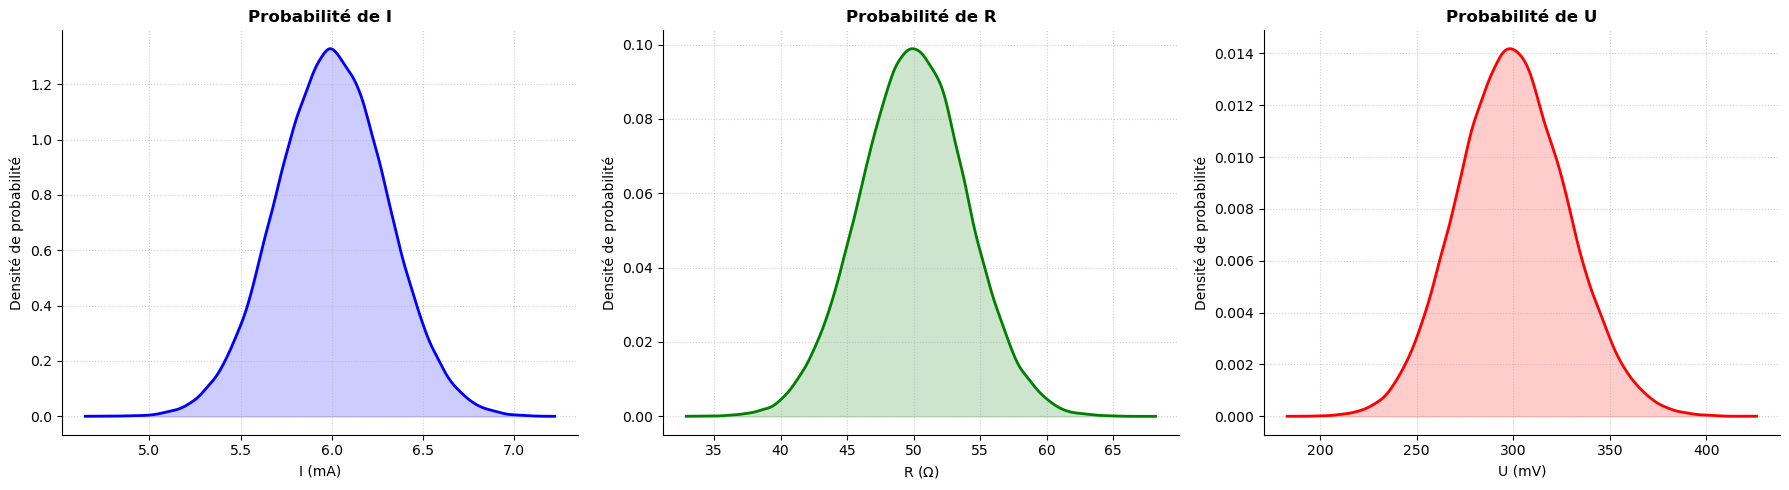

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Configuration graphique
plt.rcParams['font.family'] = 'sans-serif'

# 1. Génération des échantillons (Simulation de Monte Carlo)
n_samples = 100000

# Intensité I : moyenne 6 mA, écart-type 0.3 mA
I_samples = np.random.normal(6, 0.3, n_samples) 

# Résistance R : moyenne 50 Ohm, écart-type 4 Ohm
R_samples = np.random.normal(50, 4, n_samples)

# Tension U = R * I (Calcul point par point de l'ensemble infini)
# Si I est en mA et R en Ohm, U est en mV
U_samples = I_samples * R_samples

def plot_density(ax, data, label, color, unit):
    """Fonction utilitaire pour tracer une densité de probabilité lissée (KDE)"""
    kde = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 500)
    ax.fill_between(x, kde(x), color=color, alpha=0.2)
    ax.plot(x, kde(x), color=color, linewidth=2)
    ax.set_xlabel(f'{label} ({unit})')
    ax.set_ylabel('Densité de probabilité')
    ax.set_title(f'Probabilité de {label}', fontweight='bold')
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Création de la figure avec 3 sous-graphiques
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Tracé des trois densités
plot_density(ax1, I_samples, 'I', 'blue', 'mA')
plot_density(ax2, R_samples, 'R', 'green', '$\Omega$')
plot_density(ax3, U_samples, 'U', 'red', 'mV')

plt.tight_layout()

plt.savefig("densities.svg") # Enregistrement de la figure au format SVG
plt.show()